In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df=pd.read_csv('E:\pict\sem6\dsbdal\datasets\Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:

arr=df.columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [8]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [9]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [10]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target = ['Species']
X = df[features]
y = df[target]

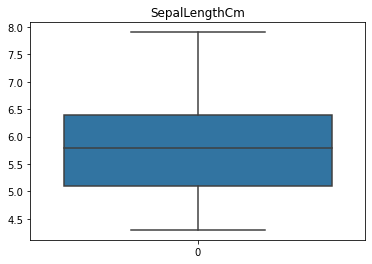

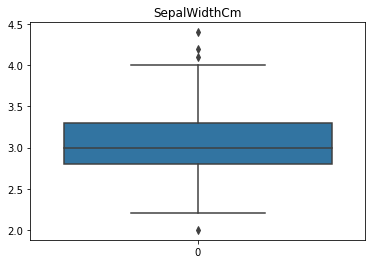

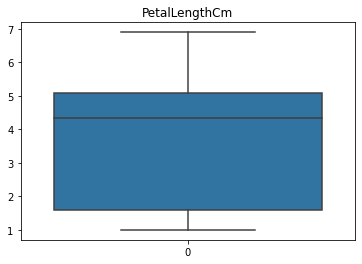

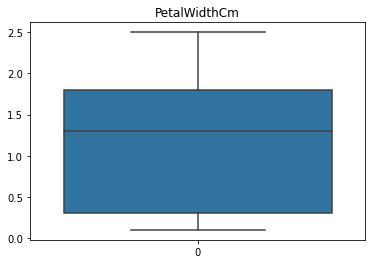

In [11]:
i = range(4)
for x in i:
    sns.boxplot(data=df[features[x]])
    plt.title(features[x])
    plt.show()

In [12]:

    q1=X['SepalWidthCm'].quantile(0.25)
    q3=X['SepalWidthCm'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    ls = df.index[(X['SepalWidthCm']<lower_bound) | (X['SepalWidthCm']>upper_bound)]


In [13]:
ls

Int64Index([15, 32, 33, 60], dtype='int64')

In [14]:
X.shape

(150, 4)

In [15]:
y.shape

(150, 1)

In [16]:
ls = sorted(set(ls))
X=X.drop(ls)
X
ls = sorted(set(ls))
y=y.drop(ls)
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


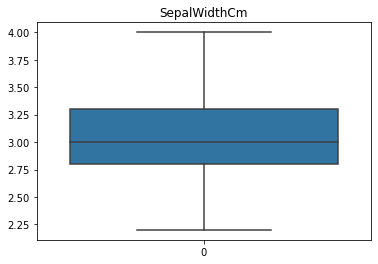

In [17]:
sns.boxplot(data=X['SepalWidthCm'])
plt.title('SepalWidthCm')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=456)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((109, 4), (37, 4), (109, 1), (37, 1))

<AxesSubplot:ylabel='Count'>

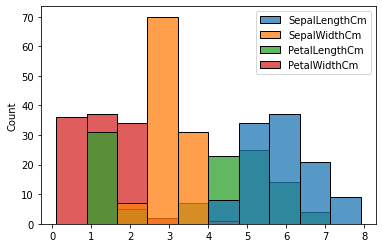

In [19]:
sns.histplot(X_train)

In [20]:
#mm = MinMaxScaler()
#X_train = mm.fit_transform(X_train)

In [21]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)

In [22]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2
13,4.3,3.0,1.1,0.1
138,6.0,3.0,4.8,1.8
95,5.7,3.0,4.2,1.2
...,...,...,...,...
83,6.0,2.7,5.1,1.6
114,5.8,2.8,5.1,2.4
45,4.8,3.0,1.4,0.3
93,5.0,2.3,3.3,1.0


In [23]:
X1_train = X_train 
y1_train = y_train 

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)
y_pred

array([[ 2.0161619 ],
       [ 1.00242269],
       [-0.03291811],
       [ 1.78220477],
       [-0.05130484],
       [ 2.05829006],
       [ 1.19972564],
       [ 1.32796956],
       [ 1.75942155],
       [ 0.91451494],
       [ 1.52074794],
       [ 1.20994516],
       [ 0.01068109],
       [ 1.15759748],
       [ 1.75967405],
       [ 1.22181979],
       [ 1.83578343],
       [ 1.04435798],
       [-0.02022118],
       [ 1.1753433 ],
       [ 2.23593594],
       [ 1.22813902],
       [ 0.0672412 ],
       [ 0.20561958],
       [ 1.10174307],
       [ 1.27282086],
       [-0.08258404],
       [ 2.07794349],
       [ 2.0688953 ],
       [ 0.08204761],
       [-0.07408807],
       [ 1.82267782],
       [ 2.06160392],
       [ 1.30607611],
       [ 0.01629977],
       [ 0.00493798],
       [ 0.87844204]])

In [26]:
mean_squared_error(y_test, y_pred)

0.032104272139292116

In [27]:
mean_absolute_error(y_test, y_pred)

0.14007470492433027

In [28]:
r2_score(y_test, y_pred)

0.9460064514020996

In [29]:
nb = GaussianNB()
nb.fit(X1_train,np.ravel(y1_train))

GaussianNB()

In [30]:
y1_pred = nb.predict(X_test)
y1_pred

array([2, 1, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1])

In [31]:
mean_squared_error(y_test, y1_pred)

0.02702702702702703

In [32]:
mean_absolute_error(y_test, y1_pred)

0.02702702702702703

In [33]:
r2_score(y_test, y1_pred)

0.9545454545454546